In [14]:
import pandas as pd
data = pd.read_csv('/content/data.csv', header = 0)
data.columns =["Gênero", "Idade", "Dívida", "Casado", "Cliente do Banco", "Nível de Educação",
                  "Raça", "Anos de Emprego", "Inadimplência Prévia", "Empregado", "Crédito",
                  "Carteira de Motorista", "Cidadão", "Código Postal", "Renda", "Status de Aprovação"]
data.describe(include = 'all')
#data
#data.info()

,Gênero,Idade,Dívida,Casado,Cliente do Banco,Nível de Educação,Raça,Anos de Emprego,Inadimplência Prévia,Empregado,Crédito,Carteira de Motorista,Cidadão,Código Postal,Renda,Status de Aprovação
count,689,689,689.000000,689,689,689,689,689.000000,689,689,689.000000,689,689,689,689.000000,689
unique,3,349,NaN,4,4,15,10,NaN,2,2,NaN,2,3,170,NaN,2
top,b,?,NaN,u,g,c,v,NaN,t,f,NaN,f,g,00000,NaN,-
freq,467,12,NaN,518,518,137,398,NaN,360,395,NaN,373,624,132,NaN,383
mean,NaN,NaN,4.765631,NaN,NaN,NaN,NaN,2.224819,NaN,NaN,2.402032,NaN,NaN,NaN,1018.862119,NaN
std,NaN,NaN,4.978470,NaN,NaN,NaN,NaN,3.348739,NaN,NaN,4.866180,NaN,NaN,NaN,5213.743149,NaN
min,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,0.000000,NaN,NaN,NaN,0.000000,NaN
25%,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,0.165000,NaN,NaN,0.000000,NaN,NaN,NaN,0.000000,NaN
50%,NaN,NaN,2.750000,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,0.000000,NaN,NaN,NaN,5.000000,NaN
75%,NaN,NaN,7.250000,NaN,NaN,NaN,NaN,2.625000,NaN,NaN,3.000000,NaN,NaN,NaN,396.000000,NaN


In [2]:
#Pré-processamento
import numpy as np

# Inspecionar valores ausentes no conjunto de dados
print(data.tail(17))

# Substituir os '?'s por NaN
data = data.replace('?', np.nan)

# Inspecione novamente os valores em falta
print(data.tail(17))

# Imputar os valores em falta com imputação média
data.fillna(data.mean(), inplace=True)

# Contar o número de 'NaNs' no conjunto de dados
number_missing = data.isnull().values.sum()
print("\n")
print('Número de valores faltando: ', number_missing)

# Iterar sobre cada coluna de dados
for col in data.columns:
    # Verifique se a coluna é do tipo objeto
    if data[col].dtypes == 'object':
        # Imputar com o valor mais freqüente
        data = data.fillna(data[col].value_counts().index[0])

# Contar novamente o número de 'NaNs' no conjunto de dados
no_number_missing = data.isnull().values.sum()
print("\n")
print('Número de valores faltando: ', no_number_missing)
print("\n")
print(data.tail(17))

    Gênero  Idade  Dívida  ... Código Postal Renda Status de Aprovação
672      ?  29.50   2.000  ...         00256    17                   -
673      a  37.33   2.500  ...         00260   246                   -
674      a  41.58   1.040  ...         00240   237                   -
675      a  30.58  10.665  ...         00129     3                   -
676      b  19.42   7.250  ...         00100     1                   -
677      a  17.92  10.210  ...         00000    50                   -
678      a  20.08   1.250  ...         00000     0                   -
679      b  19.50   0.290  ...         00280   364                   -
680      b  27.83   1.000  ...         00176   537                   -
681      b  17.08   3.290  ...         00140     2                   -
682      b  36.42   0.750  ...         00240     3                   -
683      b  40.58   3.290  ...         00400     0                   -
684      b  21.08  10.085  ...         00260     0                   -
685   

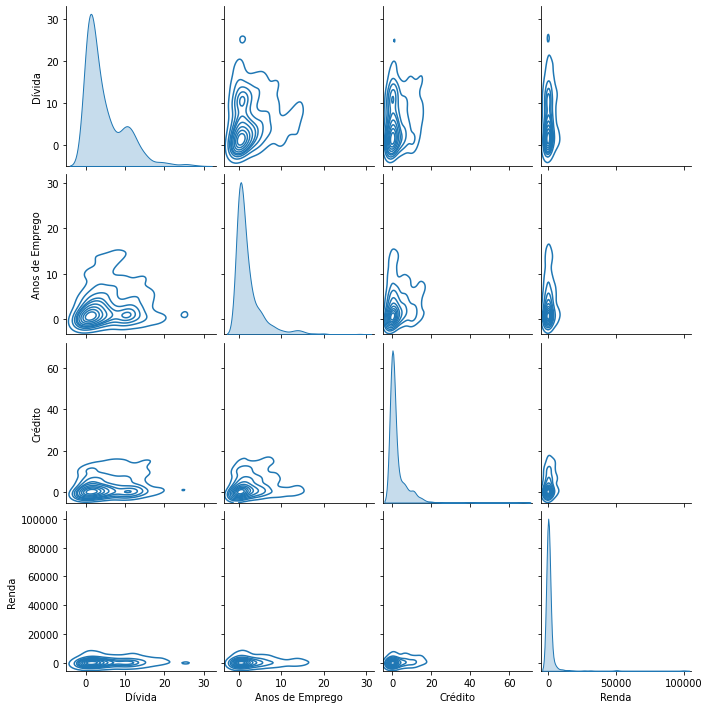

In [ ]:
#Veja os dados com Seaborn
import seaborn as sns

_ = sns.pairplot(data, kind="kde", diag_kind="kde")

In [ ]:
#Veja os dados no Facets
from google.colab import widgets

from IPython.core.display import display, HTML
import base64
!pip install facets-overview==1.0.0
from facets_overview.feature_statistics_generator import FeatureStatisticsGenerator

fsg = FeatureStatisticsGenerator()
dataframes = [
    {'table': data, 'name': 'trainData'}]
censusProto = fsg.ProtoFromDataFrames(dataframes)
protostr = base64.b64encode(censusProto.SerializeToString()).decode("utf-8")


HTML_TEMPLATE = """<script src="https://cdnjs.cloudflare.com/ajax/libs/webcomponentsjs/1.3.3/webcomponents-lite.js"></script>
        <link rel="import" href="https://raw.githubusercontent.com/PAIR-code/facets/1.0.0/facets-dist/facets-jupyter.html">
        <facets-overview id="elem"></facets-overview>
        <script>
          document.querySelector("#elem").protoInput = "{protostr}";
        </script>"""
html = HTML_TEMPLATE.format(protostr=protostr)
display(HTML(html))

In [ ]:
#Definir o número de pontos de dados a visualizar em Facets Dive

SAMPLE_SIZE = 100
  
data_dive = data.sample(SAMPLE_SIZE).to_json(orient='records')

HTML_TEMPLATE = """<script src="https://cdnjs.cloudflare.com/ajax/libs/webcomponentsjs/1.3.3/webcomponents-lite.js"></script>
        <link rel="import" href="https://raw.githubusercontent.com/PAIR-code/facets/1.0.0/facets-dist/facets-jupyter.html">
        <facets-dive id="elem" height="600"></facets-dive>
        <script>
          var data = {jsonstr};
          document.querySelector("#elem").data = data;
        </script>"""
html = HTML_TEMPLATE.format(jsonstr=data_dive)
display(HTML(html))

In [3]:
# #Pré-processamento (Converter os dados não-numéricos em numéricos)
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

# Iterar sobre todos os valores de cada coluna e extrair seus dtypes
for col in data.columns:
    if data[col].dtype=='object':
      data[col]=encoder.fit_transform(data[col])

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 689 entries, 0 to 688
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Gênero                 689 non-null    int64  
 1   Idade                  689 non-null    int64  
 2   Dívida                 689 non-null    float64
 3   Casado                 689 non-null    int64  
 4   Cliente do Banco       689 non-null    int64  
 5   Nível de Educação      689 non-null    int64  
 6   Raça                   689 non-null    int64  
 7   Anos de Emprego        689 non-null    float64
 8   Inadimplência Prévia   689 non-null    int64  
 9   Empregado              689 non-null    int64  
 10  Crédito                689 non-null    int64  
 11  Carteira de Motorista  689 non-null    int64  
 12  Cidadão                689 non-null    int64  
 13  Código Postal          689 non-null    int64  
 14  Renda                  689 non-null    int64  
 15  Status

In [4]:
from sklearn.model_selection import train_test_split

# Converter a DataFrame em uma matriz NumPy
data = data.values

# Separar características e rótulos em variáveis separadas
X,y = data[:,0:15] , data[:,15]

# Dividir dados em treinamento e teste.
X_train, X_test, y_train, y_test = train_test_split(X,
                                y,
                                test_size=0.33,
                                random_state=42)

#Escalar os valores das características para uma faixa uniforme (entre 0 e 1)
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
rescaledX_train = scaler.fit_transform(X_train)
rescaledX_test = scaler.fit_transform(X_test)

In [5]:
# Criando um regressor logístico
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(penalty='l2',verbose=1)

model.fit(rescaledX_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=1,
                   warm_start=False)

Coeficientes de Correlação medem a associação linear entre as variáveis. Podemos interpretar tais valores da seguinte forma:

*	+1 - Correlação positiva completa;
*	+0,8 - Forte correlação positiva;
*	+0,6 - Correlação positiva moderada;
*	0 - Sem qualquer correlação;
*	-0,6 - Correlação negativa moderada;
*	-0,8 - Forte correlação negativa;
*-1 - Correlação negativa completa.


In [6]:
#Coeficientes de Correlação 
features = ["Gênero", "Idade", "Dívida", "Casado", "Cliente do Banco", "Nível de Educação",
                  "Raça", "Anos de Emprego", "Inadimplência Prévia", "Empregado", "Crédito",
                  "Carteira de Motorista", "Cidadão", "Código Postal", "Renda"]
A,B = data[:,0] , data[:,15]
C,D = data[:,6] , data[:,15]
E,F = data[:,8] , data[:,15]
print('\033[1m' + 'Coeficientes de Correlação:')
print("\n")
coef = np.corrcoef(A,B)
coef = pd.DataFrame(coef, index= ["Gênero", "Status de Aprovação"],
                      columns= ["Gênero", "Status de Aprovação"])
print(coef)
print("\n")
coef = np.corrcoef(C,D)
coef = pd.DataFrame(coef, index= ["Raça", "Status de Aprovação"],
                      columns= ["Raça", "Status de Aprovação"])
print(coef)
print("\n")
coef = np.corrcoef(E,F)
coef = pd.DataFrame(coef, index= ["Inadimplência Prévia", "Status de Aprovação"],
                      columns= ["Inadimplência Prévia", "Status de Aprovação"])
print(coef)
import array as arr
a = arr.array('f', [0.03, -0.13, -0.20, 0.19, 0.18, -0.12, 0.0003, -0.32, -0.71, -0.45, -0.40, -0.03, 0.10, 0.09, -0.17])

corre = pd.DataFrame(a, columns=["Coeficientes de Correlação"],
    index=features)
print('\n')
corre

Coeficientes de Correlação:


                       Gênero  Status de Aprovação
Gênero               1.000000             0.030043
Status de Aprovação  0.030043             1.000000


                         Raça  Status de Aprovação
Raça                 1.000000             0.000378
Status de Aprovação  0.000378             1.000000


                      Inadimplência Prévia  Status de Aprovação
Inadimplência Prévia              1.000000            -0.719987
Status de Aprovação              -0.719987             1.000000




,Coeficientes de Correlação
Gênero,0.0300
Idade,-0.1300
Dívida,-0.2000
Casado,0.1900
Cliente do Banco,0.1800
Nível de Educação,-0.1200
Raça,0.0003
Anos de Emprego,-0.3200
Inadimplência Prévia,-0.7100
Empregado,-0.4500


In [7]:
#Testando a performance do Modelo
from sklearn.metrics import confusion_matrix
y_pred = model.predict(rescaledX_test)
print('\033[1m' + 'Performance (acurácia) do modelo de regressão logística: ', 
      model.score(rescaledX_test, y_test))
# Matriz de Confusão
df = confusion_matrix(y_test, y_pred)
confusão = pd.DataFrame(df, index= ["Classe verdadeira (Negativo)", 
                                    "Classe verdadeira (Positivo) "],
                      columns= ["Classe prevista (Negativo)", 
                                "Classe prevista (Positivo)"])
print('\n')
confusão


Performance (acurácia) do modelo de regressão logística:  0.8596491228070176




,Classe prevista (Negativo),Classe prevista (Positivo)
Classe verdadeira (Negativo),94,6
Classe verdadeira (Positivo),26,102


In [9]:
# Coeficientes do Modelo

coefs = pd.DataFrame(
    model.coef_,
    columns=features,
    index=["Coeficientes"])
coefs.transpose()

,Coeficientes
Gênero,-0.211754
Idade,0.476012
Dívida,-0.526039
Casado,1.753660
Cliente do Banco,0.510739
Nível de Educação,-0.568626
Raça,-0.002892
Anos de Emprego,-0.903885
Inadimplência Prévia,-3.210696
Empregado,-0.879579


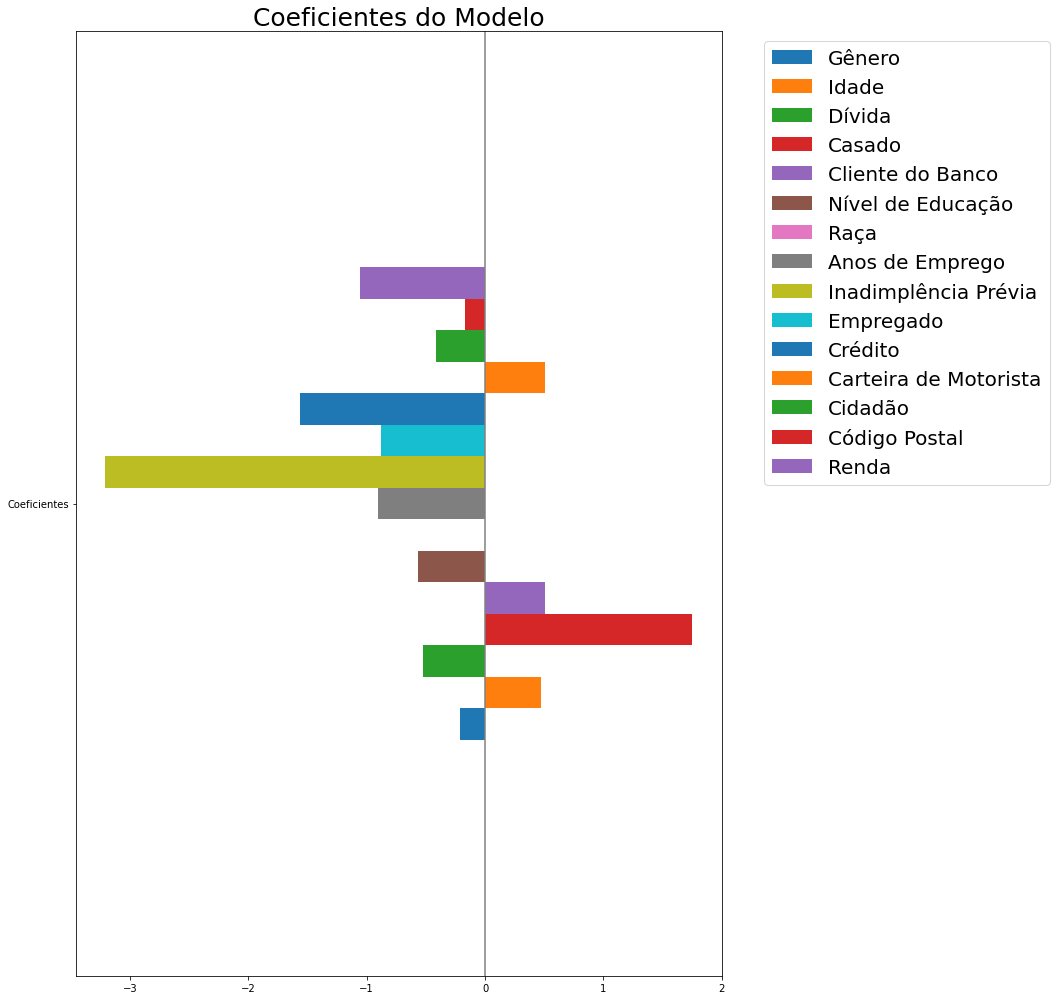

In [10]:
import matplotlib.pyplot as plt

coefs.plot(kind="barh", figsize=(20, 14))
plt.title("Coeficientes do Modelo", fontsize=25)
plt.axvline(x=0, color=".5")
plt.legend(fontsize=20, bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.tight_layout()
plt.subplots_adjust(left=0.3)

In [11]:
#Variância das Características (para ver a variância não-normalizada, utilizar 'X_train.var(axis=0, dtype= 'f')')
var = pd.DataFrame(rescaledX_train.var(axis=0, dtype= 'f'),
    columns=["Variância das Característivas(Normalizadas)"],
    index=features)
var


,Variância das Característivas(Normalizadas)
Gênero,0.208865
Idade,0.076239
Dívida,0.033415
Casado,0.027758
Cliente do Banco,0.084081
Nível de Educação,0.101294
Raça,0.083564
Anos de Emprego,0.038214
Inadimplência Prévia,0.249942
Empregado,0.242659


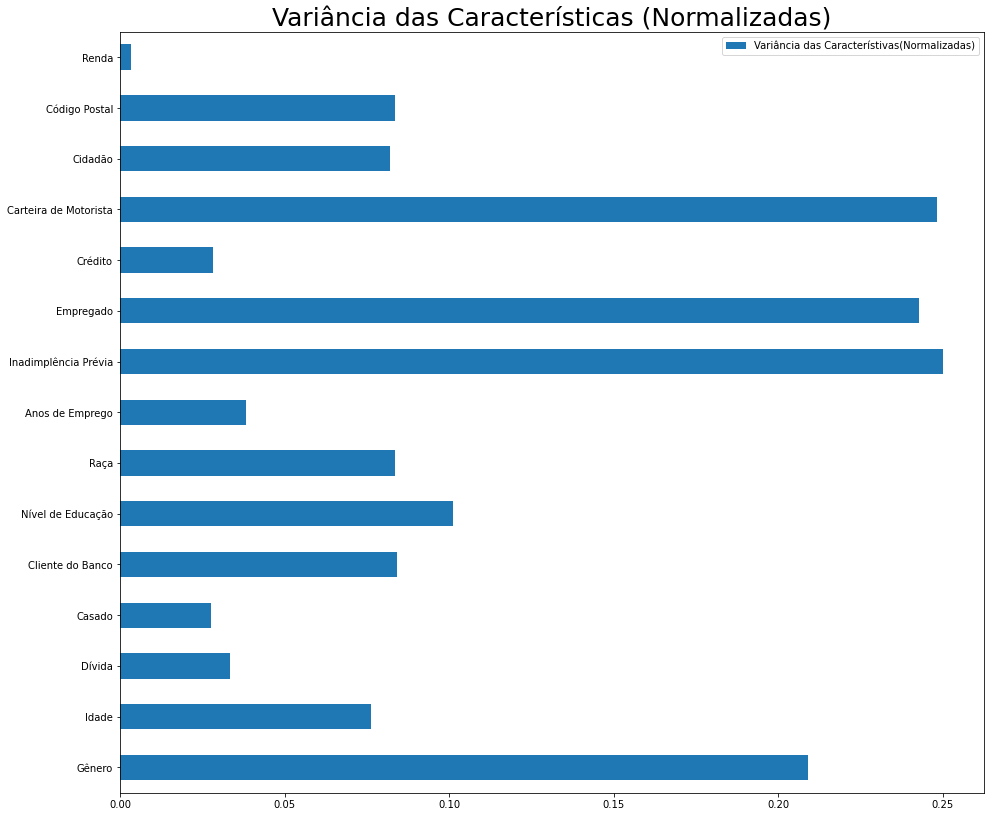

In [12]:
print('\n')
var.plot(kind="barh", figsize=(20, 14))
plt.title("Variância das Características (Normalizadas)", fontsize=25)
plt.subplots_adjust(left=0.3)

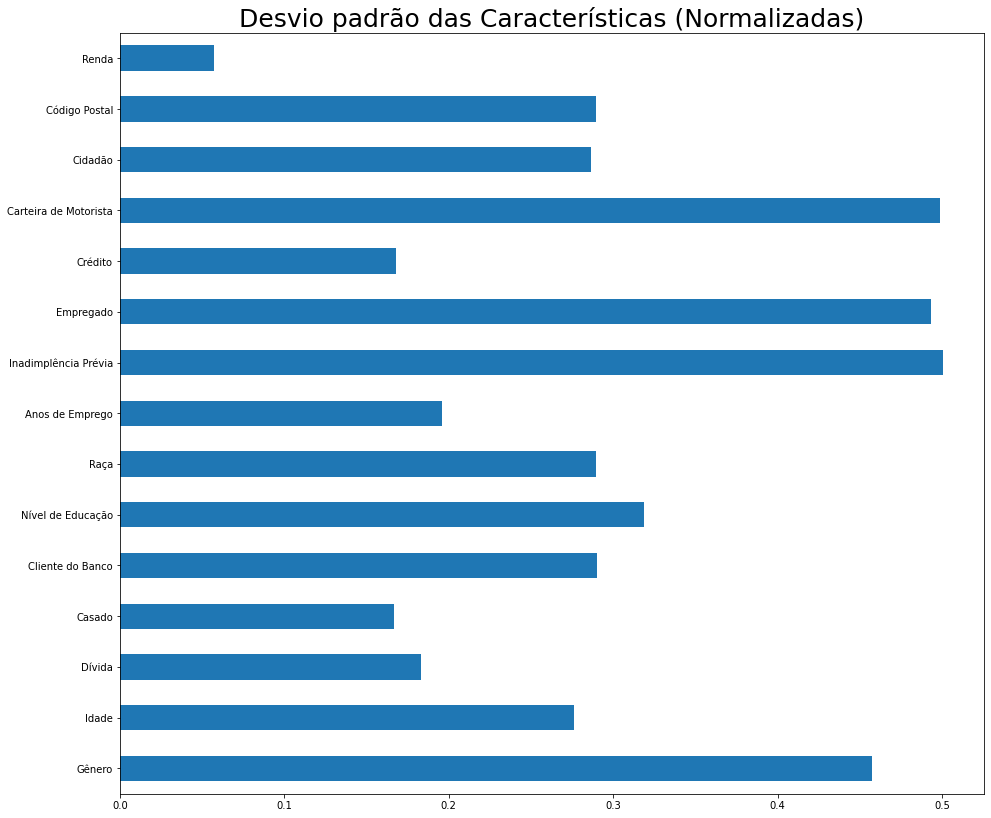

In [13]:
df = pd.DataFrame(rescaledX_train, columns=features)

df.std(axis=0).plot(kind="barh", figsize=(20, 14))
plt.title("Desvio padrão das Características (Normalizadas)", fontsize=25)
plt.subplots_adjust(left=0.3)

Multiplicar os coeficientes pelo desvio padrão da característica relacionada reduz todos os coeficientes para a mesma unidade de medida. Quanto maior a variação de uma característica, maior o peso do coeficiente correspondente na saída (todos os outros valores se mantendo igual). O gráfico abaixo nos fala das dependências entre uma característica específica e o alvo quando todas as outras características permanecem constantes, i.e., as dependências condicionais. 

                       Coeficientes Normalizados
Gênero                                 -0.096775
Idade                                   0.131433
Dívida                                 -0.096159
Casado                                  0.292171
Cliente do Banco                        0.148098
Nível de Educação                      -0.180975
Raça                                   -0.000836
Anos de Emprego                        -0.176695
Inadimplência Prévia                   -1.605163
Empregado                              -0.433284
Crédito                                -0.262832
Carteira de Motorista                   0.253311
Cidadão                                -0.118482
Código Postal                          -0.049283
Renda                                  -0.060623


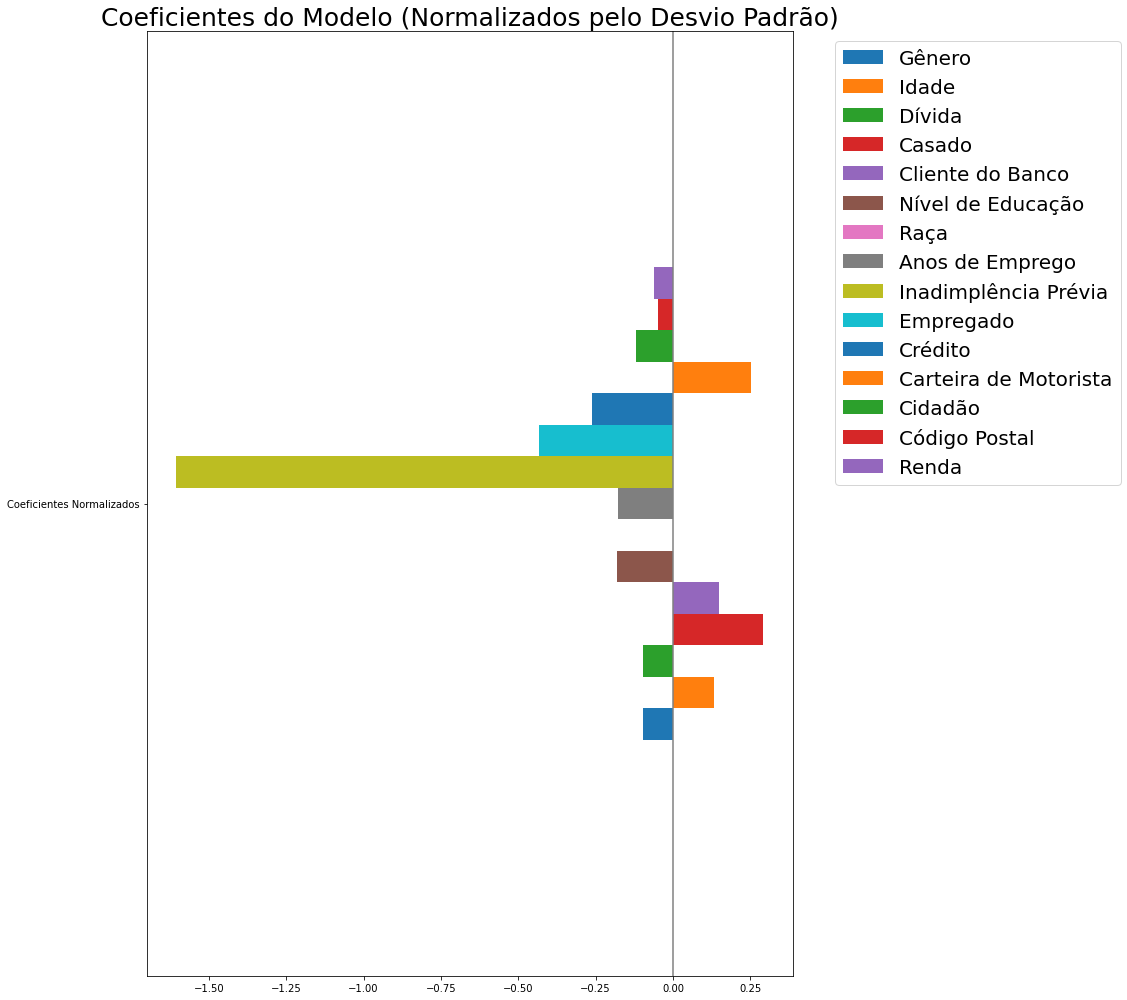

In [ ]:
coefs = pd.DataFrame(model.coef_ * rescaledX_train.std(axis=0),
    columns=features,
    index=["Coeficientes Normalizados"])
print(coefs.transpose())
coefs.plot(kind="barh", figsize=(20, 14))
plt.title("Coeficientes do Modelo (Normalizados pelo Desvio Padrão)", fontsize=25)
plt.axvline(x=0, color=".5")
plt.legend(fontsize=20, bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.tight_layout()
plt.subplots_adjust(left=0.3)